In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from OceanPSC.GanGeneration import Generation,print_classes

In [2]:
print_classes()

0 abp
1 active_margin
2 cr
3 csh
4 land_csh
5 mor
6 passive_margin
7 rs
8 s_abp
9 s_rs
10 vrs


In [2]:
gen=Generation()

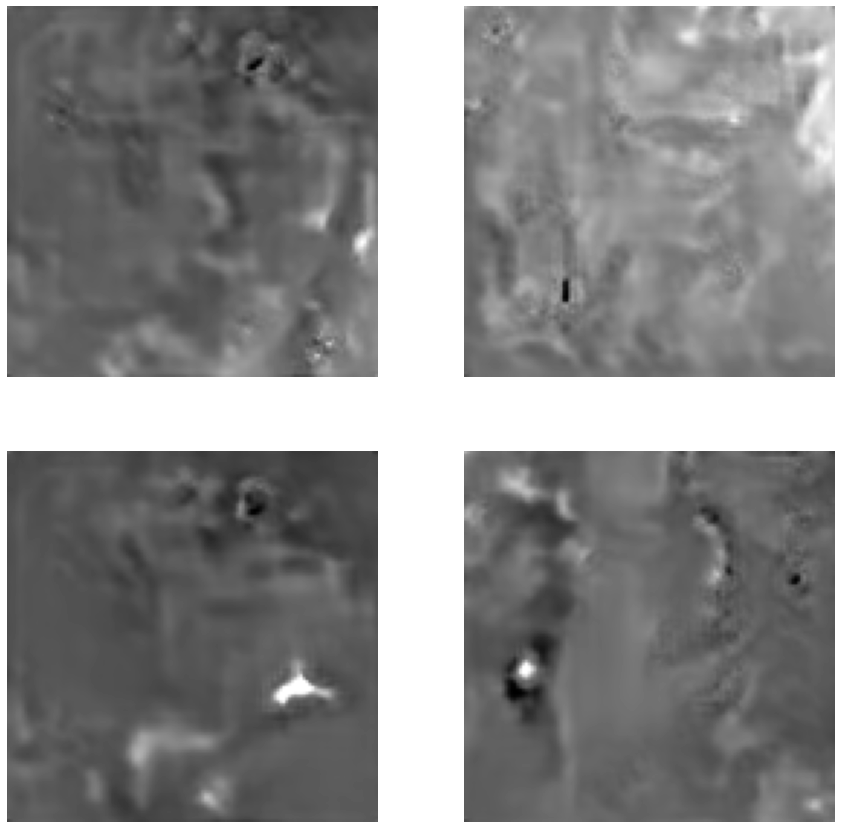

In [4]:
plt.figure(figsize=(15,15))
for i in range(4):
    map=gen.generate_one_sample(7)
    plt.subplot(2,2,i+1)
    plt.imshow(map,cmap='gray')
    plt.axis('off')
plt.show()

In [3]:
classes=np.array([[7,7,7,7],
                  [7,9,7,7],
                  [10,7,7,0],
                  [7,0,0,8],
                 ])

In [6]:
map=gen.generate_tiled_map(classes)

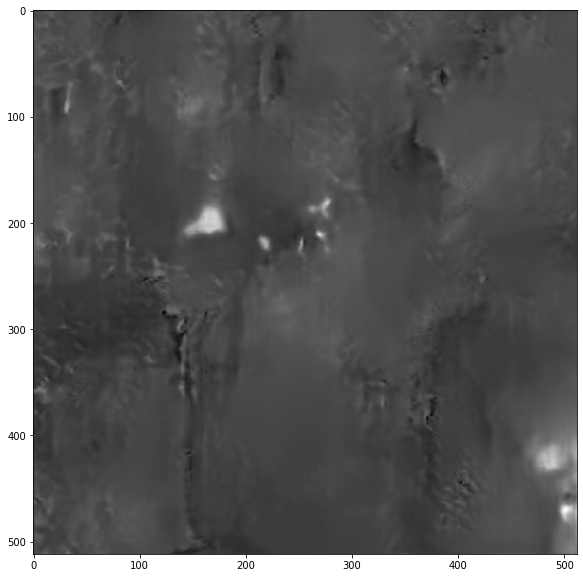

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(map,cmap='gray')